In [1]:
import pandas as pd
from PIL import Image
import os
import numpy as np

In [2]:
images_path = '../images'
population_data_path = '../data/full_data.csv'

In [3]:
def crop_and_resize(image: Image.Image, size: int) -> Image.Image:
    """
    Crop a PIL image to a square by trimming the longer side and centering,
    then resize it to the designated resolution.
    
    :param image: Input PIL Image
    :param size: Target resolution (size x size)
    :return: Processed PIL Image
    """
    width, height = image.size
    min_side = min(width, height)
    
    # Calculate crop box for center cropping
    left = (width - min_side) // 2
    top = (height - min_side) // 2
    right = left + min_side
    bottom = top + min_side
    
    # Crop to square
    cropped_image = image.crop((left, top, right, bottom))
    
    # Resize to designated resolution
    resized_image = cropped_image.resize((size, size), Image.LANCZOS)
    
    return resized_image

In [4]:
images = {}

for dir in os.listdir(images_path):
    if not dir.endswith('.png'):
        continue
    
    full_path = f'{images_path}/{dir}'
    image = Image.open(full_path)
    square_image = crop_and_resize(image, 512)
    images[dir[:-4].lower()] = square_image
    
print(f'Loaded {len(images)} images')
images

Loaded 944 images


{'aalborg': <PIL.Image.Image image mode=RGB size=512x512>,
 'aarhus': <PIL.Image.Image image mode=RGB size=512x512>,
 'abadan': <PIL.Image.Image image mode=RGB size=512x512>,
 'abu_dhabi': <PIL.Image.Image image mode=RGB size=512x512>,
 'adana': <PIL.Image.Image image mode=RGB size=512x512>,
 'aden': <PIL.Image.Image image mode=RGB size=512x512>,
 'ad_dammam': <PIL.Image.Image image mode=RGB size=512x512>,
 'agra': <PIL.Image.Image image mode=RGB size=512x512>,
 'ahvaz': <PIL.Image.Image image mode=RGB size=512x512>,
 'ajmer': <PIL.Image.Image image mode=RGB size=512x512>,
 'akola': <PIL.Image.Image image mode=RGB size=512x512>,
 'alajuela': <PIL.Image.Image image mode=RGB size=512x512>,
 'albuquerque': <PIL.Image.Image image mode=RGB size=512x512>,
 'aleppo': <PIL.Image.Image image mode=RGB size=512x512>,
 'aleysk': <PIL.Image.Image image mode=RGB size=512x512>,
 'aligarh': <PIL.Image.Image image mode=RGB size=512x512>,
 'almaty': <PIL.Image.Image image mode=RGB size=512x512>,
 'al_ah

In [5]:
images_df = pd.DataFrame.from_dict(images, orient='index', columns=['image'])
images_df = images_df.reset_index().rename(columns={'index': 'name'})
images_df

,name,image
0,aalborg,<PIL.Image.Image image mode=RGB size=512x512 a...
1,aarhus,<PIL.Image.Image image mode=RGB size=512x512 a...
2,abadan,<PIL.Image.Image image mode=RGB size=512x512 a...
3,abu_dhabi,<PIL.Image.Image image mode=RGB size=512x512 a...
4,adana,<PIL.Image.Image image mode=RGB size=512x512 a...
...,...,...
939,zilina,<PIL.Image.Image image mode=RGB size=512x512 a...
940,zunyi,<PIL.Image.Image image mode=RGB size=512x512 a...
941,zurich,<PIL.Image.Image image mode=RGB size=512x512 a...
942,`ajman,<PIL.Image.Image image mode=RGB size=512x512 a...


In [6]:
population = pd.read_csv(population_data_path)
population['name'] = population['name'].str.lower().str.replace(' ', '_')
population

,name,lon,lat,population
0,shanghai,121.4670,31.1667,22120000
1,beijing,116.3910,39.9050,19433000
2,shenzhen,114.0540,22.5350,15929000
3,guangzhou,113.2590,23.1288,20902000
4,chengdu,104.0670,30.6636,11309000
...,...,...,...,...
959,zadar,15.2167,44.1167,75082
960,nampula,39.2667,-15.1167,477900
961,slavonski_brod,18.0144,45.1553,56769
962,karlovac,15.5558,45.4931,53134


In [7]:
df = pd.merge(population, images_df, on='name', how='left')
df.dropna(inplace=True)
df

,name,lon,lat,population,image
0,shanghai,121.4670,31.1667,22120000,<PIL.Image.Image image mode=RGB size=512x512 a...
1,beijing,116.3910,39.9050,19433000,<PIL.Image.Image image mode=RGB size=512x512 a...
2,shenzhen,114.0540,22.5350,15929000,<PIL.Image.Image image mode=RGB size=512x512 a...
3,guangzhou,113.2590,23.1288,20902000,<PIL.Image.Image image mode=RGB size=512x512 a...
4,chengdu,104.0670,30.6636,11309000,<PIL.Image.Image image mode=RGB size=512x512 a...
...,...,...,...,...,...
959,zadar,15.2167,44.1167,75082,<PIL.Image.Image image mode=RGB size=512x512 a...
960,nampula,39.2667,-15.1167,477900,<PIL.Image.Image image mode=RGB size=512x512 a...
961,slavonski_brod,18.0144,45.1553,56769,<PIL.Image.Image image mode=RGB size=512x512 a...
962,karlovac,15.5558,45.4931,53134,<PIL.Image.Image image mode=RGB size=512x512 a...


In [8]:
X = df['image'].to_list()
X = np.array(X)
X_flatten = np.array(X).reshape(-1, 512*512*3)
print(X.shape)
print(X_flatten.shape)  # for regression models

(964, 512, 512, 3)
(964, 786432)


In [9]:
def transform_population(X):
    return np.log10(np.array(X)) * 1e-1

def detransform_population(X):
    return np.pow(10, np.array(X) * 1e1)

In [10]:
y = df['population']
y_transformed = transform_population(y)
y_transformed = y_transformed.tolist()
y_transformed = np.array(y_transformed).reshape(-1, 1)
y_transformed.shape

(964, 1)

In [11]:
def forward(prediction, target):
    numerator = np.abs(target - prediction)
    denominator = np.abs(target) + 1e-8
    relative_loss = numerator / denominator
    return relative_loss.mean()


<h3>Linear regression</h3>

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [13]:
X_flatten_train, X_flatten_test, y_train, y_test = train_test_split(X_flatten, y_transformed, test_size=0.2, random_state=123)

In [14]:
# model.fit(X_train, y_train)
linear_model = LinearRegression()
linear_model.fit(X_flatten_train, y_train)
y_pred_linear_test = linear_model.predict(X_flatten_test)
y_test_flat = y_test.ravel()
y_pred_flat_test = y_pred_linear_test.ravel()


In [15]:
y_pred_linear_train = linear_model.predict(X_flatten_train)
y_train_flat = y_train.ravel()
y_pred_flat_train = y_pred_linear_train.ravel()

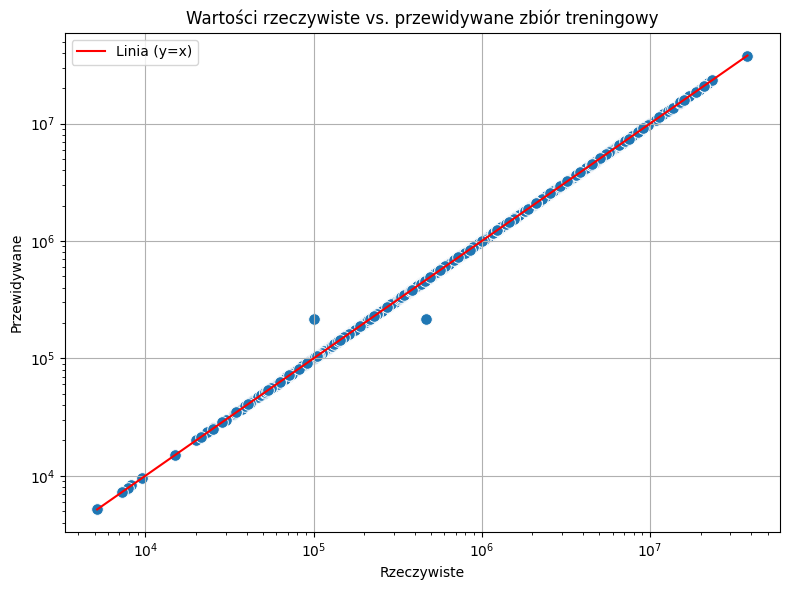

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
df_results = pd.DataFrame({'Actual': detransform_population(y_train_flat), 'Predicted': detransform_population(y_pred_flat_train)})

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Actual', y='Predicted', data=df_results, s=70)
sns.lineplot(x='Actual', y='Actual', data=df_results, color='red', label='Linia (y=x)')
plt.title('Wartości rzeczywiste vs. przewidywane zbiór treningowy')
plt.xlabel('Rzeczywiste')
plt.ylabel('Przewidywane')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

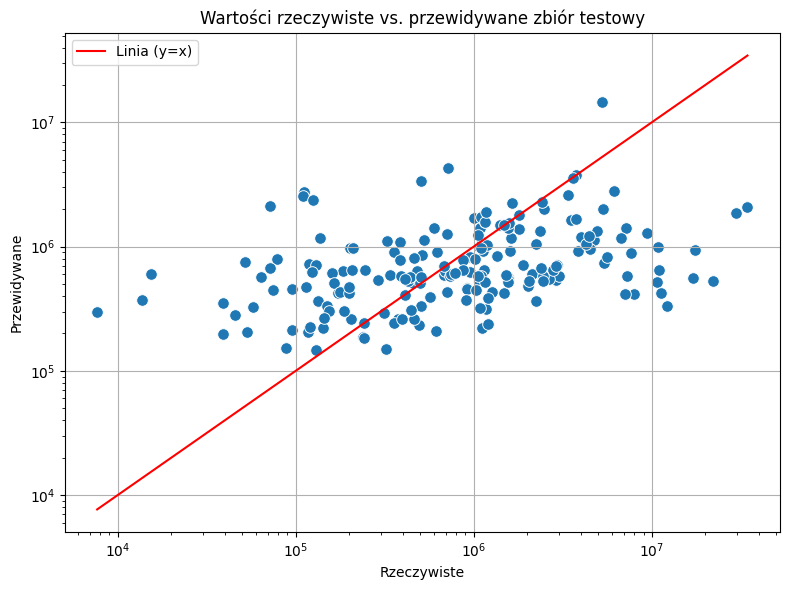

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
df_results = pd.DataFrame({'Actual': detransform_population(y_test_flat), 'Predicted': detransform_population(y_pred_flat_test)})

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Actual', y='Predicted', data=df_results, s=70)
sns.lineplot(x='Actual', y='Actual', data=df_results, color='red', label='Linia (y=x)')
plt.title('Wartości rzeczywiste vs. przewidywane zbiór testowy')
plt.xlabel('Rzeczywiste')
plt.ylabel('Przewidywane')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
forward(detransform_population(y_pred_flat_test), detransform_population(y_test_flat))

np.float64(2.1584198812745305)

In [19]:
forward(detransform_population(y_pred_flat_train), detransform_population(y_train_flat))

np.float64(0.002188426536927688)

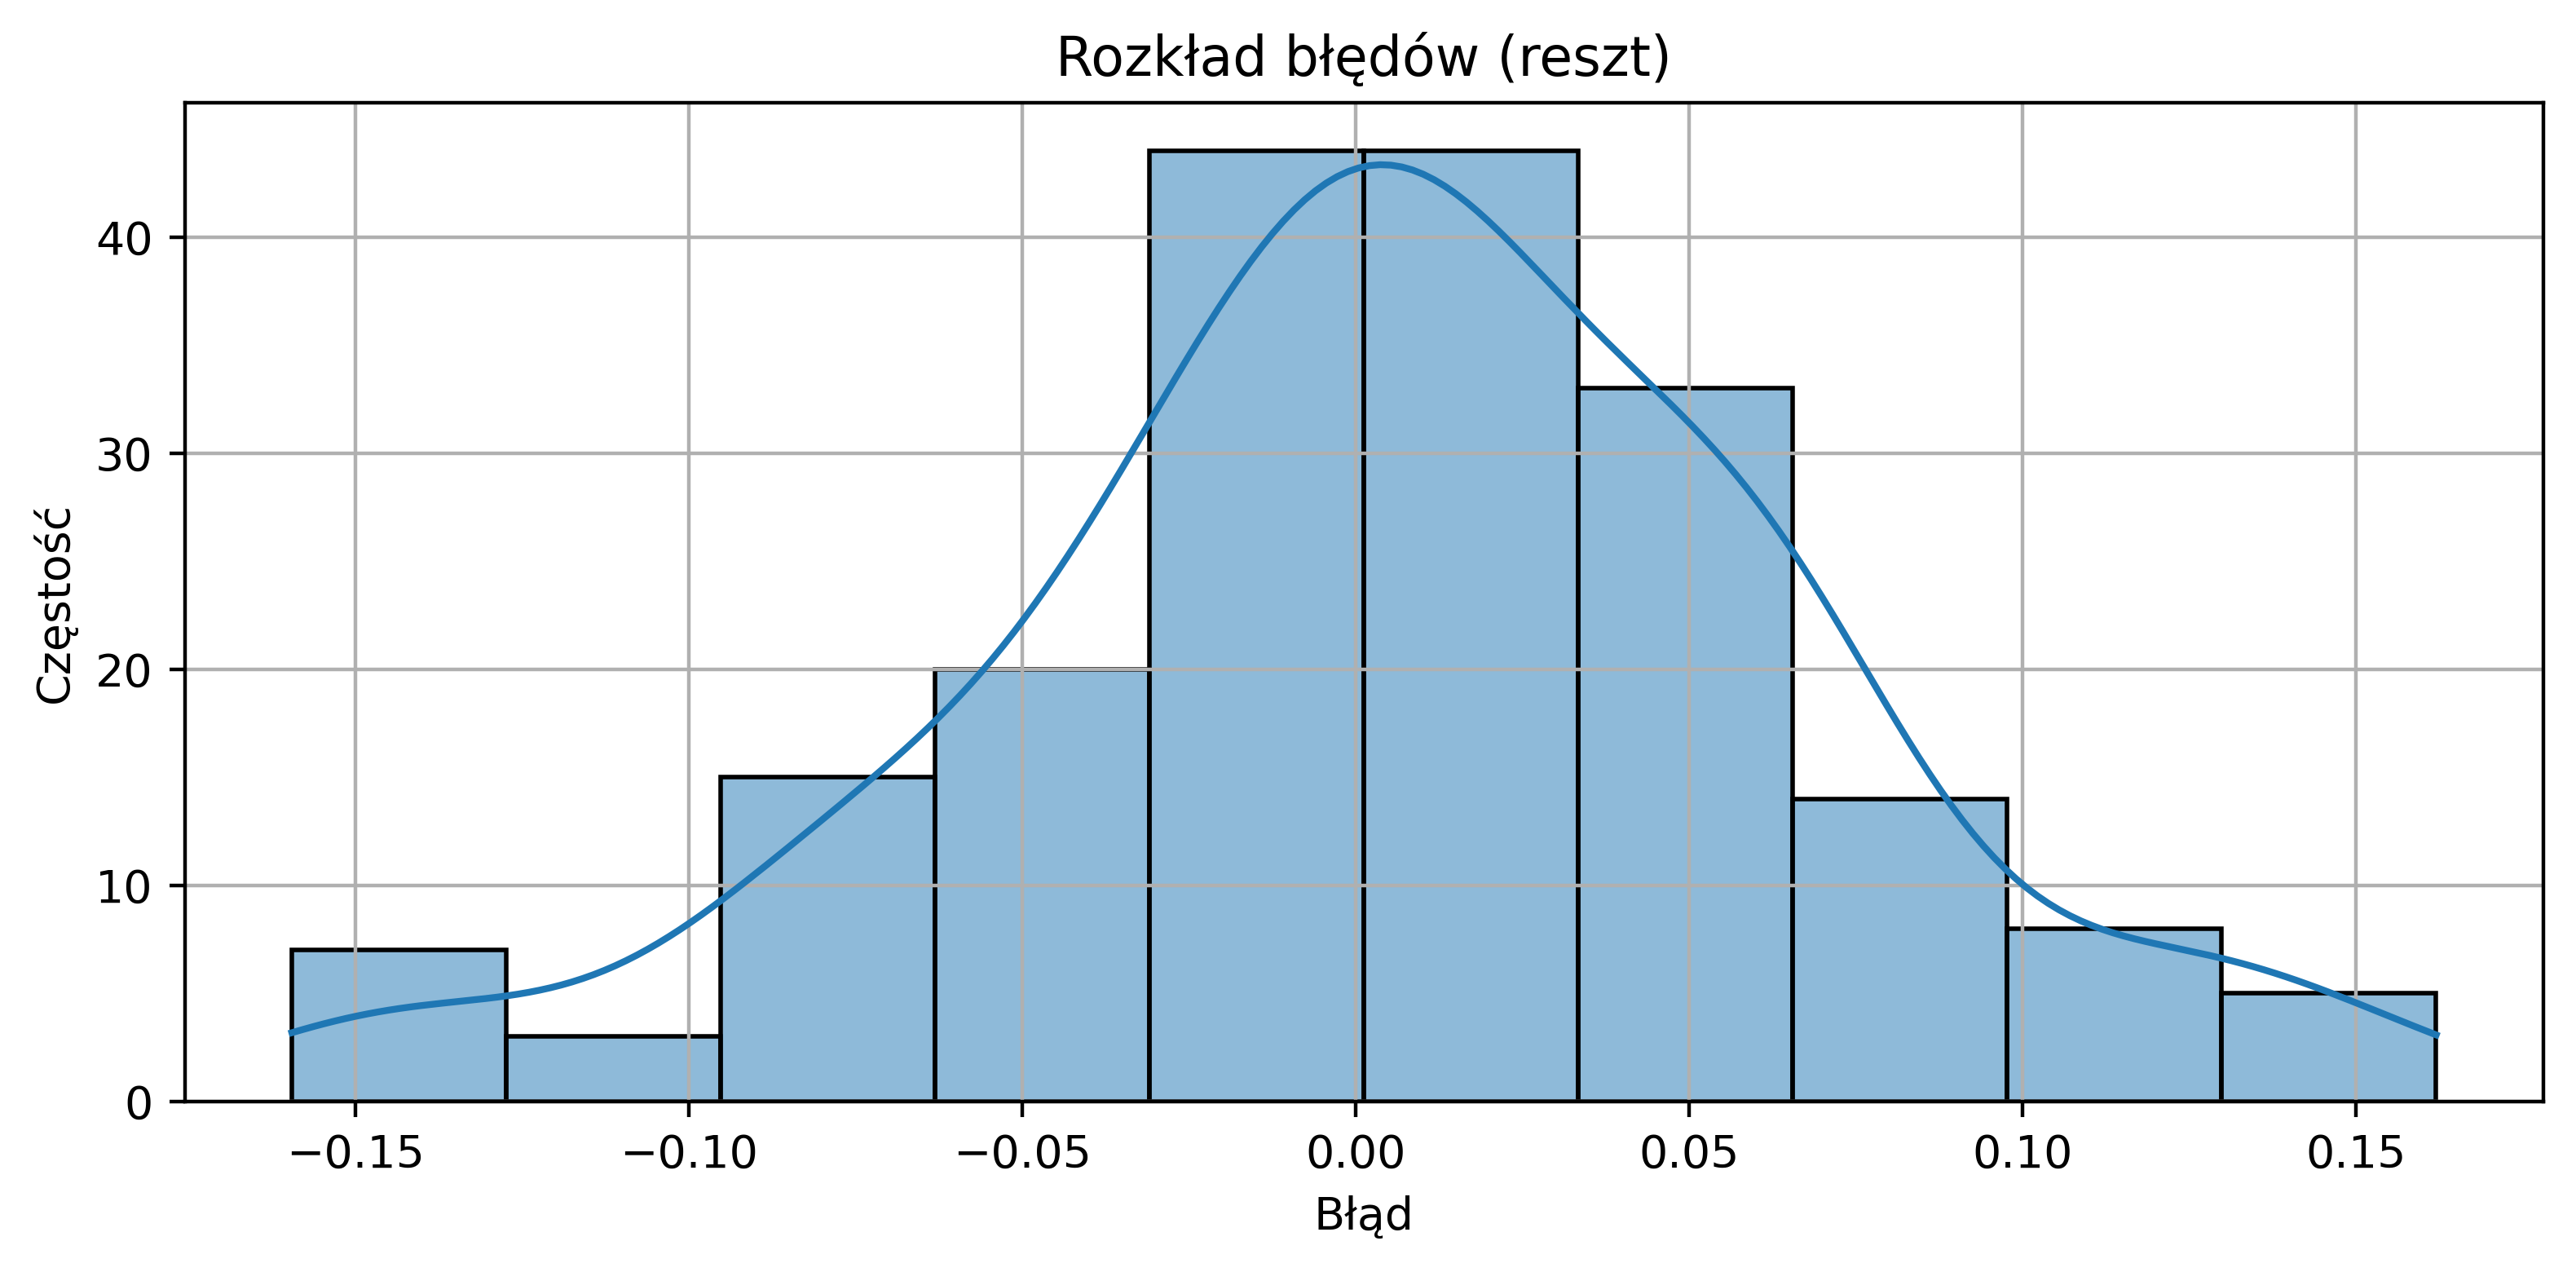

In [20]:
# Reszty (błędy predykcji)
residuals = y_test_flat - y_pred_flat_test

plt.figure(figsize=(8, 4), dpi=400)
sns.histplot(residuals, kde=True, bins=10)
plt.title('Rozkład błędów (reszt)')
plt.xlabel('Błąd')
plt.ylabel('Częstość')
plt.grid(True)
plt.tight_layout()
plt.show()


### polynomial regression


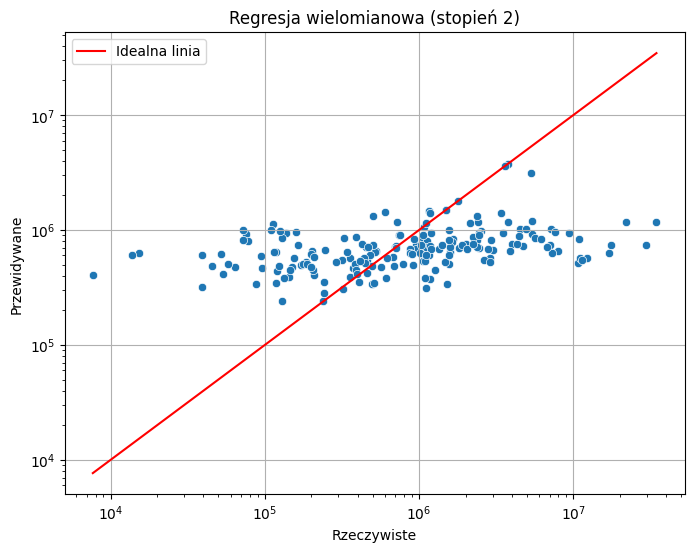

In [21]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

X_train_poly = np.hstack([X_flatten_train ** d for d in [1,2]])
X_test_poly = np.hstack([X_flatten_test ** d for d in [1,2]])

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

y_test_flat = y_test.ravel()
y_pred_flat_test = y_pred.ravel()

df_results = pd.DataFrame({'Actual': detransform_population(y_test_flat), 'Predicted': detransform_population(y_pred_flat_test)})

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_results, x='Actual', y='Predicted')
sns.lineplot(x='Actual', y='Actual', data=df_results, color='red', label='Idealna linia')
plt.title(f'Regresja wielomianowa (stopień 2)')
plt.xlabel('Rzeczywiste') 
plt.ylabel('Przewidywane')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()


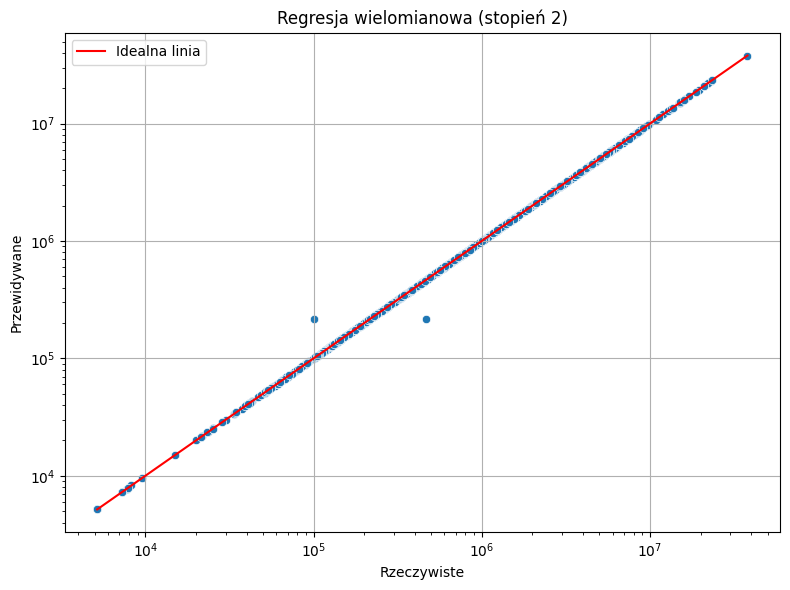

In [22]:
y_pred_train = model.predict(X_train_poly)

y_train_flat = y_train.ravel()
y_pred_flat_train = y_pred_train.ravel()

df_results = pd.DataFrame({'Actual': detransform_population(y_train_flat), 'Predicted': detransform_population(y_pred_flat_train)})

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_results, x='Actual', y='Predicted')
sns.lineplot(x='Actual', y='Actual', data=df_results, color='red', label='Idealna linia')
plt.title(f'Regresja wielomianowa (stopień 2)')
plt.xlabel('Rzeczywiste') 
plt.ylabel('Przewidywane')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [23]:
forward(detransform_population(y_pred_flat_test), detransform_population(y_test_flat))

np.float64(2.1868892831824)

In [24]:
forward(detransform_population(y_pred_flat_train), detransform_population(y_train_flat))

np.float64(0.0021884265369283324)